<a href="https://colab.research.google.com/github/Tanushree-233/RandomForest_For_CreditScoring/blob/main/final_creditworthiness_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.805

Confusion Matrix:
[[ 31  28]
 [ 11 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.53      0.61        59
           1       0.82      0.92      0.87       141

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200



/tmp/ipython-input-1-2307248869.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


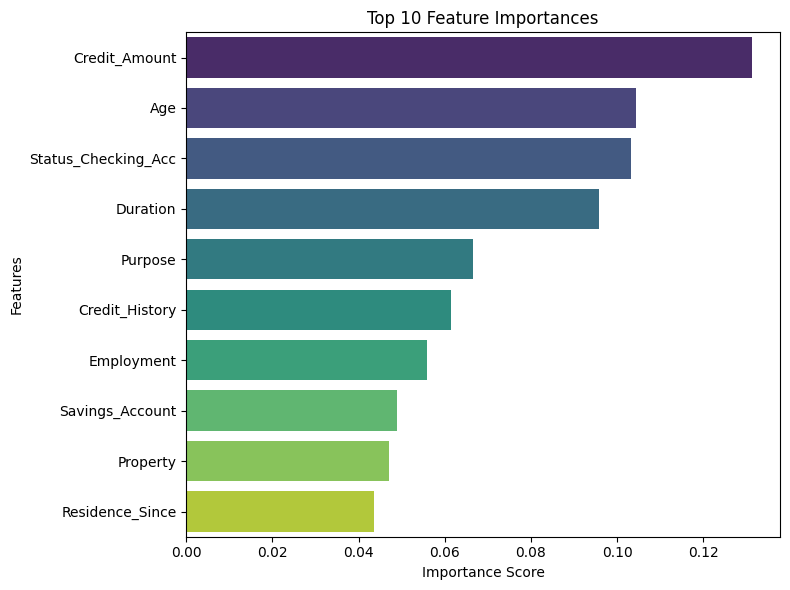

Predictions saved to credit_predictions.csv
Random Forest model saved to credit_rf_model.joblib
Encoded dataset saved to encoded_german_credit_data.csv


In [1]:

# Creditworthiness Prediction using Random Forest

### Dataset Source:
# Statlog (German Credit Data) - UCI Machine Learning Repository
# URL: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 1: Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    "Status_Checking_Acc", "Duration", "Credit_History", "Purpose",
    "Credit_Amount", "Savings_Account", "Employment", "Installment_Rate",
    "Personal_Status", "Other_Debtors", "Residence_Since", "Property",
    "Age", "Other_Installment_Plans", "Housing", "Existing_Credits",
    "Job", "Num_People_Maintained", "Telephone", "Foreign_Worker", "Credit_Risk"
]

df = pd.read_csv(url, sep=' ', header=None, names=column_names)

# Step 2: Preprocessing
df["Credit_Risk"] = df["Credit_Risk"].map({1: 1, 2: 0})  # 1 = Good, 0 = Bad

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop("Credit_Risk", axis=1)
y = df["Credit_Risk"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Step 7: Export predictions
predictions_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
predictions_df.to_csv("credit_predictions.csv", index=False)
print("Predictions saved to credit_predictions.csv")

# Step 8: Save trained model
joblib.dump(model, "credit_rf_model.joblib")
print("Random Forest model saved to credit_rf_model.joblib")

# Step 9: Save encoded dataset (optional)
df.to_csv("encoded_german_credit_data.csv", index=False)
print("Encoded dataset saved to encoded_german_credit_data.csv")